In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph

/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/samples_notebooks


# Example of complete workflow with a very simple piece of code 
`simple/simple.c`

```
int foo(int input){
    int secret = 10;
	if (input < secret){
		return 32;
	} else{
		return 44;
	}
}

int main(){
    int x = foo(10);
    return x;

}
```

In [2]:
from test_main import setup 

binary = os.path.abspath("./simple_func_call/simple_func_call")
outputfile = "./simple_func_call.s"
loader, rw = setup(binary, outputfile)
rw.dump()

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


In [3]:
with open(outputfile, "r") as f: 
    content = f.read() 
    print(content)

.section .rodata
.align 4
.type	_IO_stdin_used_2000,@object
.globl _IO_stdin_used_2000
_IO_stdin_used_2000: # 2000 -- 2004
.LC2000:
	.byte 0x1
.LC2001:
	.byte 0x0
.LC2002:
	.byte 0x2
.LC2003:
	.byte 0x0

.section .data
.align 8
.LC4018:
	.byte 0x0
.LC4019:
	.byte 0x0
.LC401a:
	.byte 0x0
.LC401b:
	.byte 0x0
.LC401c:
	.byte 0x0
.LC401d:
	.byte 0x0
.LC401e:
	.byte 0x0
.LC401f:
	.byte 0x0
.LC4020:
	.quad .LC4020
.section .bss
.align 1
.type	completed.8060_4028,@object
.globl completed.8060_4028
completed.8060_4028: # 4028 -- 4029
.LC4028:
	.byte 0x0
.LC4029:
	.byte 0x0
.LC402a:
	.byte 0x0
.LC402b:
	.byte 0x0
.LC402c:
	.byte 0x0
.LC402d:
	.byte 0x0
.LC402e:
	.byte 0x0
.LC402f:
	.byte 0x0
.section .text
.align 16
	.text
.globl foo
.type foo, @function
foo:
.L1130:
.LC1130:
	pushq %rbp
.LC1131:
	movq %rsp, %rbp
.LC1134:
	movl %edi, -8(%rbp)
.LC1137:
	movl $0xa, -0xc(%rbp)
.LC113e:
	movl -8(%rbp), %eax
.LC1141:
	cmpl -0xc(%rbp), %eax
.LC1144:
	jge .L1156
.LC114a:
	movl $0x20, -4(%rbp)
.LC1151:

[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


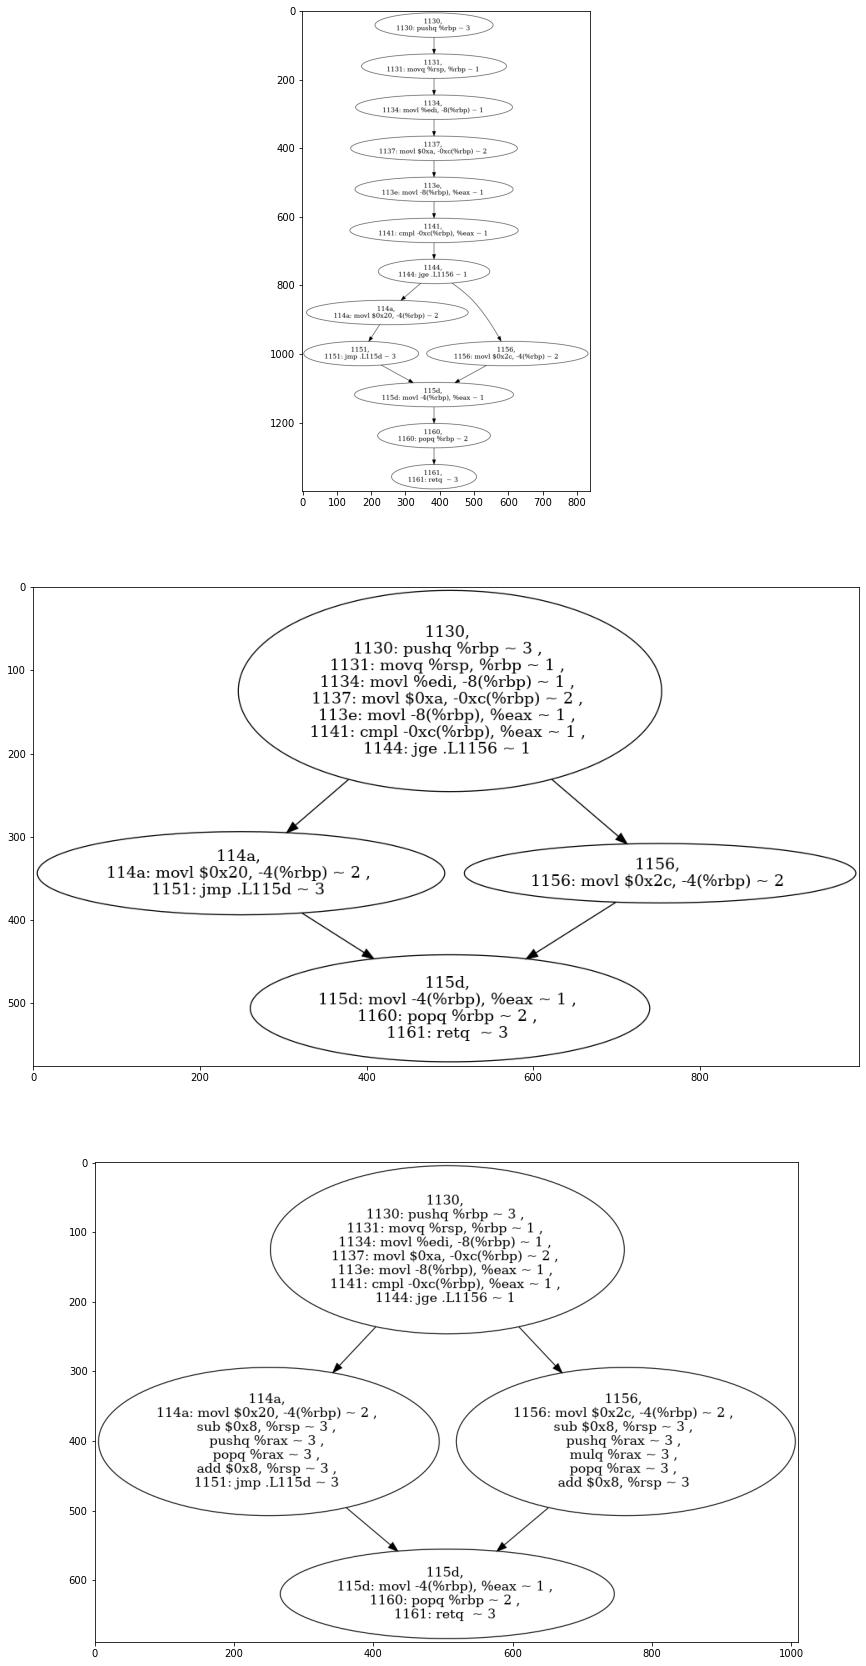

In [4]:
from rwtools.nemesis.graph.utils import create_graph_structure, to_img
from rwtools.nemesis.graph.balance import balance_branching_point 

loader, rw = setup(binary, outputfile)

# list of all function names -- for each function seperately make a graph and balance it
function_names = loader.container.function_names



nodes, graph = create_graph_structure(loader.container, "foo")
fig, axs = plt.subplots(3, 1, figsize=(30, 30))

axs[0].imshow(to_img(graph))
                    
control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()

axs[1].imshow(to_img(graph))

target_node = control_flow_graph.get_node('1130')

balance_branching_point(control_flow_graph, target_node)

axs[2].imshow(to_img(graph))

In [5]:
rw.dump()
rw.outfile

with open(outputfile, "r") as f: 
    content = f.read() 
    print(content)

.section .rodata
.align 4
.type	_IO_stdin_used_2000,@object
.globl _IO_stdin_used_2000
_IO_stdin_used_2000: # 2000 -- 2004
.LC2000:
	.byte 0x1
.LC2001:
	.byte 0x0
.LC2002:
	.byte 0x2
.LC2003:
	.byte 0x0

.section .data
.align 8
.LC4018:
	.byte 0x0
.LC4019:
	.byte 0x0
.LC401a:
	.byte 0x0
.LC401b:
	.byte 0x0
.LC401c:
	.byte 0x0
.LC401d:
	.byte 0x0
.LC401e:
	.byte 0x0
.LC401f:
	.byte 0x0
.LC4020:
	.quad .LC4020
.section .bss
.align 1
.type	completed.8060_4028,@object
.globl completed.8060_4028
completed.8060_4028: # 4028 -- 4029
.LC4028:
	.byte 0x0
.LC4029:
	.byte 0x0
.LC402a:
	.byte 0x0
.LC402b:
	.byte 0x0
.LC402c:
	.byte 0x0
.LC402d:
	.byte 0x0
.LC402e:
	.byte 0x0
.LC402f:
	.byte 0x0
.section .text
.align 16
	.text
.globl foo
.type foo, @function
foo:
.L1130:
.LC1130:
	pushq %rbp
.LC1131:
	movq %rsp, %rbp
.LC1134:
	movl %edi, -8(%rbp)
.LC1137:
	movl $0xa, -0xc(%rbp)
.LC113e:
	movl -8(%rbp), %eax
.LC1141:
	cmpl -0xc(%rbp), %eax
.LC1144:
	jge .L1156
.LC114a:
	movl $0x20, -4(%rbp)
sub $0x8